# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [28]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

In [29]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

In [31]:
# Criando um df com os dados desejados
df_servicos = df_pib.copy()
df_servicos = df_servicos.query('ano == 2018')[['regiao', 'va_servicos']]
df_servicos = df_servicos.groupby('regiao').sum()
df_servicos = df_servicos.sort_values('va_servicos', ascending=False)

df_servicos

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


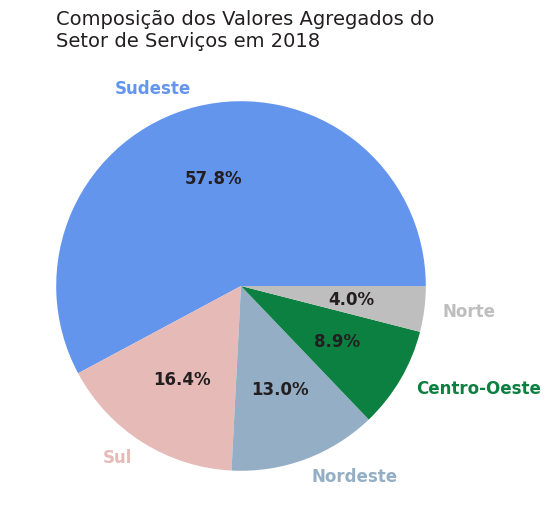

In [32]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14, 6))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE1, CINZA5]

# Personalizando o gráfico
ax.set_title(
    'Composição dos Valores Agregados do\nSetor de Serviços em 2018',
    fontsize=14,
    ha='left',
    color=CINZA1,
    x=0.1,
)

# Gerando o gráfico de pizza
ptc, text, _ = ax.pie(
    data=df_servicos,
    x='va_servicos',
    labels=df_servicos.index,
    autopct='%.1f%%',
    pctdistance=0.6,
    colors=cores,
    textprops={'size': 12, 'fontweight': 'bold', 'color': CINZA1},
)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

plt.show()

### Desafio 2

In [33]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

In [35]:
# Criando um df com os dados desejados
df_n_2010 = df_pib.query('ano == 2010')[['regiao', 'va_industria']]
df_n_2020 = df_pib.query('ano == 2020')[['regiao', 'va_industria']]

# Renomeando todas as regiões exceto a Norte como 'Outros'
df_n_2010.loc[df_n_2010['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_n_2020.loc[df_n_2020['regiao'] != 'Norte', 'regiao'] = 'Outros'

# Agrupando os dados
df_n_2010 = df_n_2010.groupby('regiao').sum()
df_n_2020 = df_n_2020.groupby('regiao').sum()

display(df_n_2010, df_n_2020)

,va_industria
regiao,
Norte,58665438171
Outros,845492561850


,va_industria
regiao,
Norte,137740478879
Outros,1346596521109


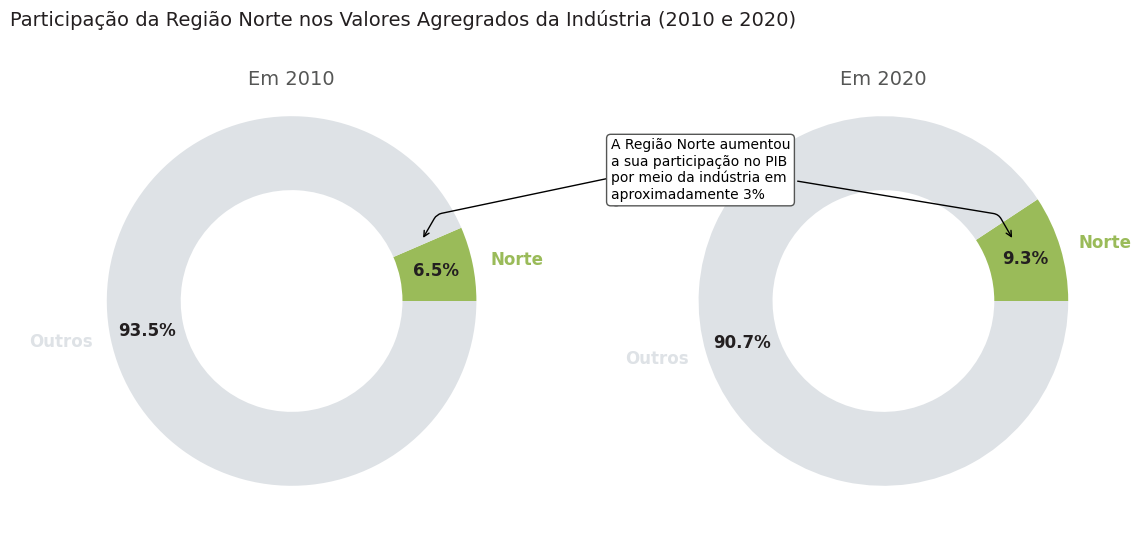

In [36]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Definindo as cores do gráfico
cores = [VERDE2, CINZA6]

# Personalizando o gráfico
plt.suptitle('Participação da Região Norte nos Valores Agregrados da Indústria (2010 e 2020)',
             fontsize=14, color=CINZA1, ha='left', x=0.1)

# GRÁFICO 1 - Valores Agregados Norte x Outros em 2010
ptc, text, _ = axs[0].pie(data=df_n_2010, x="va_industria", labels=df_n_2010.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight": "bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors=cores)

# Título do Gráfico 1
axs[0].set_title('Em 2010', fontsize=14, color=CINZA3, y=0.95)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

#######################################

# GRÁFICO 2 - Valores Agregados Norte x Outros em 2020
ptc, text, _ = axs[1].pie(data=df_n_2020, x="va_industria", labels=df_n_2020.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight": "bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors=cores)

# Título do Gráfico 2
axs[1].set_title('Em 2020', fontsize=14, color=CINZA3, y=0.95)

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

#######################################

# Anotações do gráfico
axs[0].annotate('\n\n\n', xy=(260, 210), xycoords='axes points', xytext=(400, 240), textcoords='axes points',            bbox=dict(
    boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=60,armA=30,armB=30,rad=5"))

axs[1].annotate('A Região Norte aumentou\na sua participação no PIB\npor meio da indústria em\naproximadamente 3%', xy=(260, 210), xycoords='axes points', xytext=(-30, 240), textcoords='axes points',
                bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5"))

plt.show()

## Aula 02 - Compondo dados estáticos

### Desafio 1

In [37]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [38]:
# Importando as bibliotecas
import pandas as pd
import plotly.graph_objects as go

# Importando a base de dados do PIB de 2002 a 2020
df_sp = pd.read_csv(
    "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
df_sp = df_sp.query("sigla_uf == 'SP' and ano == 2020")[
    ["va", "impostos_liquidos", "pib"]]
df_sp.rename(columns={"pib": "PIB", "impostos_liquidos": "Impostos Líquidos",
             "va": "Valor Agregado Bruto"}, inplace=True)

# Alterando o df para passar os indicadores para uma única coluna e seus valores em outra
df_sp = df_sp.melt(var_name="Indicadores", value_name="Valores")

# Criando uma coluna com os valores em string e outra com as medidas
df_sp["Valores_str"] = (df_sp["Valores"]/1e12).map("R$ {:,.3f} tri".format)
df_sp["Medidas"] = ["absolute", "relative", "total"]

df_sp

,Indicadores,Valores,Valores_str,Medidas
0,Valor Agregado Bruto,2014850308310,R$ 2.015 tri,absolute
1,Impostos Líquidos,362788671543,R$ 0.363 tri,relative
2,PIB,2377638979835,R$ 2.378 tri,total


In [39]:
# Gerando o gráfico de cascata
fig = go.Figure(go.Waterfall(name="", measure=df_sp["Medidas"],
                             x=df_sp["Indicadores"],  y=df_sp["Valores"],
                             text=df_sp["Valores_str"], textposition="outside",
                             connector_line=dict(color=CINZA4),
                             totals_marker=dict(color=AZUL3),
                             increasing_marker=dict(color=VERDE1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family='DejaVu Sans', font_size=14,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=18,
                  title_text='Composição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                             f'<br><sup size=1 style="color:{CINZA3}">Em trilhões de reais</sup>',
                  plot_bgcolor=BRANCO, yaxis_range=[0, 2.6e12], hovermode="closest")

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Dados ao passar o mouse
fig.update_traces(hovertemplate="<b>%{x}</b> = %{text}")

fig.show()

### Desafio 2

In [40]:
# Importando as bibliotecas
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Importando a base de dados do PIB de 2002 a 2020
df_ne = pd.read_csv(
    "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
anos = [x for x in range(2016, 2021)]
df_ne = df_ne.query(
    "regiao == 'Nordeste' and ano == @anos")[["ano", "va_servicos"]]
df_ne = df_ne.groupby("ano").sum().reset_index()

# Gerando a coluna com a variação do valor agregado da indústria
# e passando o valor inicial para a 1ª linha da variação
df_ne["variacao_servicos"] = df_ne["va_servicos"].diff().fillna(
    df_ne["va_servicos"]).astype("int64")

# Gerando uma coluna com as Medidas para o gráfico de cascata
df_ne["Medidas"] = ["absolute"] + ["relative"] * 4

# Gerando uma observação com a atualização da última linha com o PIB total de 2020
linha = pd.Series({'ano': 'Total',
                   'va_servicos': df_ne["va_servicos"].values[-1],
                   'variacao_servicos': df_ne["va_servicos"].values[-1],
                   'Medidas': "total"}).to_frame().T

# Concatenando o df com a atualização e retirando a coluna pib
df_ne = pd.concat([df_ne, linha], axis=0, ignore_index=True)
df_ne = df_ne.drop(columns=["va_servicos"])

# Criando uma coluna com os valores em string
df_ne["variacao_servicos_texto"] = (
    df_ne["variacao_servicos"]/1e9).map('R$ {:,.2f} Bi'.format)

df_ne

,ano,variacao_servicos,Medidas,variacao_servicos_texto
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [41]:
# Gerando o gráfico de cascata
fig = go.Figure(go.Waterfall(name="", measure=df_ne["Medidas"], y=df_ne["variacao_servicos"],
                             text=df_ne["variacao_servicos_texto"], textposition="outside",
                             connector_line=dict(color=CINZA3),
                             totals_marker=dict(color=AZUL3),
                             increasing_marker=dict(color=VERDE1),
                             decreasing_marker=dict(color=VERMELHO1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family='DejaVu Sans', font_size=12,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=18,
                  title_text='Variação do Valor Agregado de Serviços no Nordeste' +
                             f'<br><sup size=1 style={CINZA3}>De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor=BRANCO, yaxis_range=[0, 500e9])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(
    0, 6), ticktext=df_ne["ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate="<b>%{x}</b> = %{text}")

fig.add_annotation(text="No período destacado, <b>apenas</b><br>no ano de 2020 houve recuo do<br>valor agregado do <b>setor de<br>serviços</b> na região Nordeste",
                   align="left", axref='x', ayref='y', x=4, y=390e9, ax=3, ay=250e9,
                   arrowhead=1, arrowside="start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor=CINZA3, borderwidth=1, borderpad=4)

fig.show()

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

In [42]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [43]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_reg = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

# Criando um df com os dados desejados
anos = [x for x in range(2017, 2021)]
df_reg = df_reg.query('ano == @anos')[['ano', 'regiao', 'pib']]
df_reg['pib'] = (df_reg['pib'] / 1e12).round(2)

# Criando uma tabela cruzada (crosstab) com os valores de cada ano por região
df_reg = pd.crosstab(index=df_reg.ano, columns=df_reg.regiao,
                     values=df_reg.pib, aggfunc='sum')
df_reg = df_reg[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
df_reg = df_reg.reset_index()

df_reg

regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


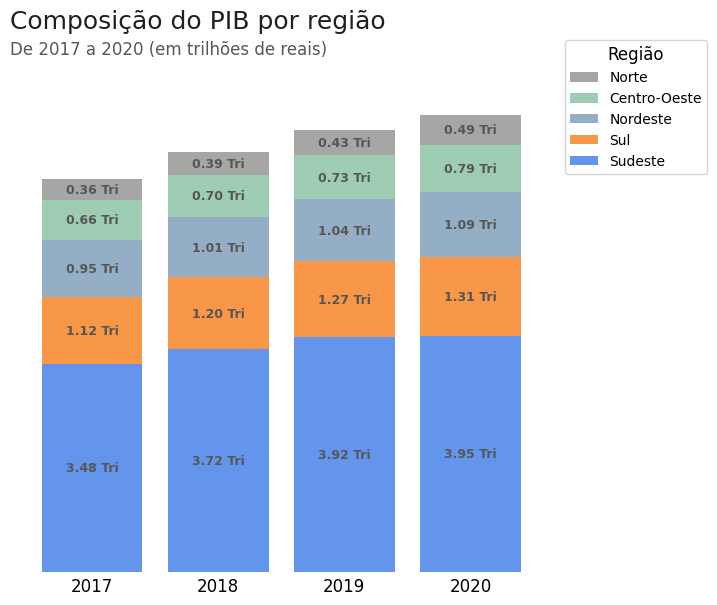

In [44]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(7, 7))

# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

# Personalizando o título
ax.set_title('Composição do PIB por região', fontsize=18,
             color=CINZA1, ha='left', x=0, transform=ax.transAxes)
ax.text(0, 0.97, 'De 2017 a 2020 (em trilhões de reais)', color=CINZA3,
        fontsize=12, ha='left', va='center', transform=ax.transAxes)

# Construindo o gráfico de colunas empilhadas
df_reg.plot(x='ano', kind='bar', width=0.8, stacked=True, color=cores, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=12, color=CINZA2, labelrotation=0)
ax.set_ylim(0, 9)
ax.set_frame_on(False)

# Adicionar a legenda do lado superior direito
ax.legend(bbox_to_anchor=(1.01, 1), reverse=True,
          title='Região', title_fontsize=12, fontsize=10)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os valores dentro da coluna
for container in ax.containers:
    labels = [f'{valor.get_height():.2f} Tri' for valor in container]
    ax.bar_label(container, label_type='center', labels=labels,
                 size=9, color=CINZA3, fontweight='bold')

plt.show()

### Desafio 2

In [45]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_n_estados = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

# Criando um df com os dados desejados
df_n_estados = df_n_estados.query('regiao == "Centro-Oeste" and ano == 2020')[
    ['sigla_uf', 'va_servicos', 'va_industria', 'va_adespss', 'va_agropecuaria']]
df_n_estados = df_n_estados.set_index('sigla_uf')
df_n_estados = df_n_estados.sort_values(by='va_servicos', axis=0)

df_n_estados

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


In [46]:
# Código para gerar o texto colorido
from matplotlib import transforms


def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(
            ax.transData, x=0, y=(i + 1) * esp, units='dots')

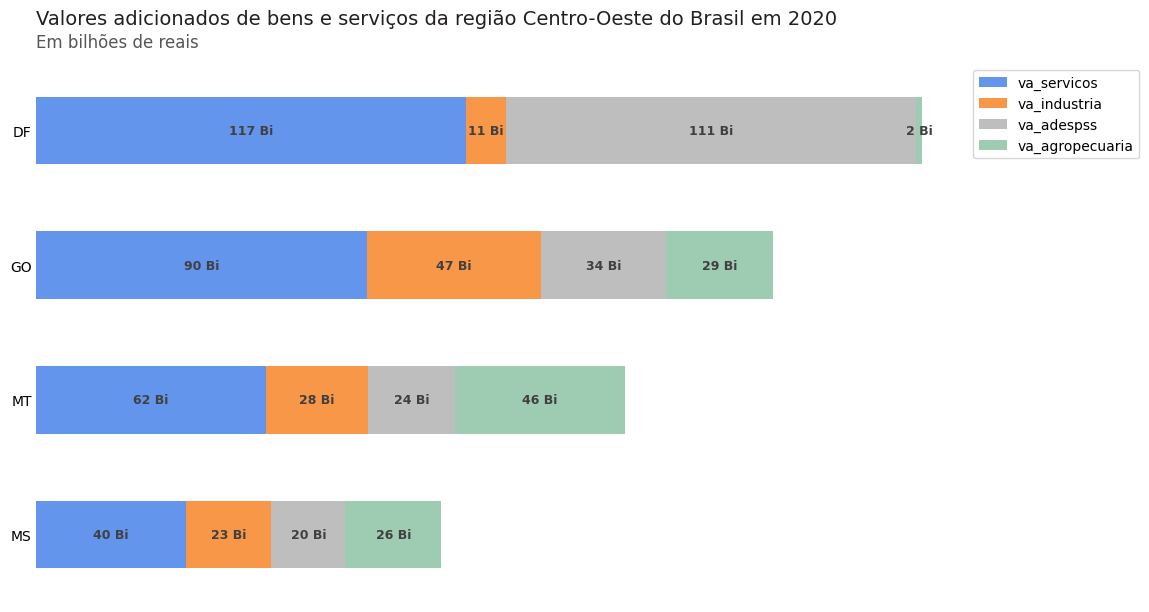

In [47]:
def grafico_va():
    # Área do gráfico e tema da visualização
    fig, ax = plt.subplots(figsize=(12, 7))

    # Definindo as cores do gráfico
    cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

    # Gerando o gráfico de barras empilhadas 100%
    df_n_estados.plot(kind="barh", stacked=True, color=cores, ax=ax)

    # Personalizando o gráfico
    plt.suptitle('Valores adicionados de bens e serviços da região Centro-Oeste do Brasil em 2020', size=14,
                 color=CINZA1, ha='left', x=0, y=1.1, transform=ax.transAxes)
    plt.title('Em bilhões de reais', fontsize=12, color=CINZA3,
              ha="left", x=0, y=1.03, transform=ax.transAxes)
    ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes,
              fontsize=10, loc='upper left')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10, color=CINZA2)
    ax.set_frame_on(False)

    # remover todos os ticks do eixo x e y
    ax.tick_params(axis='both', which='both', length=0)

    # Valores das barras
    for container in ax.containers:
        labels = [f'{valor.get_width()/1e9:.0f} Bi' for valor in container]
        ax.bar_label(container, label_type='center', labels=labels,
                     size=9, color=CINZA2, fontweight='bold')

    return ax, cores


ax, cores = grafico_va()

<>:15: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:17: SyntaxWarning:

invalid escape sequence '\ '

<>:19: SyntaxWarning:

invalid escape sequence '\ '

<>:22: SyntaxWarning:

invalid escape sequence '\ '

<>:23: SyntaxWarning:

invalid escape sequence '\ '

<>:15: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:17: SyntaxWarning:

invalid escape sequence '\ '

<>:19: SyntaxWarning:

invalid escape sequence '\ '

<>:22: SyntaxWarning:

invalid escape sequence '\ '

<>:23: SyntaxWarning:

invalid escape sequence '\ '

C:\Users\julio.gazoli\AppData\Local\Temp\ipykernel_19352\2270162294.py:15: SyntaxWarning:

invalid escape sequence '\ '

C:\Users\julio.gazoli\AppData\Local\Temp\ipykernel_19352\2270162294.py:16: SyntaxWarning:

invalid escape sequence '\ '

C:\Users\julio.gazoli\AppData\Local\Temp\ipykernel_19352\2270162294.py:17: SyntaxWarning:

invalid escape sequence '\ '

C

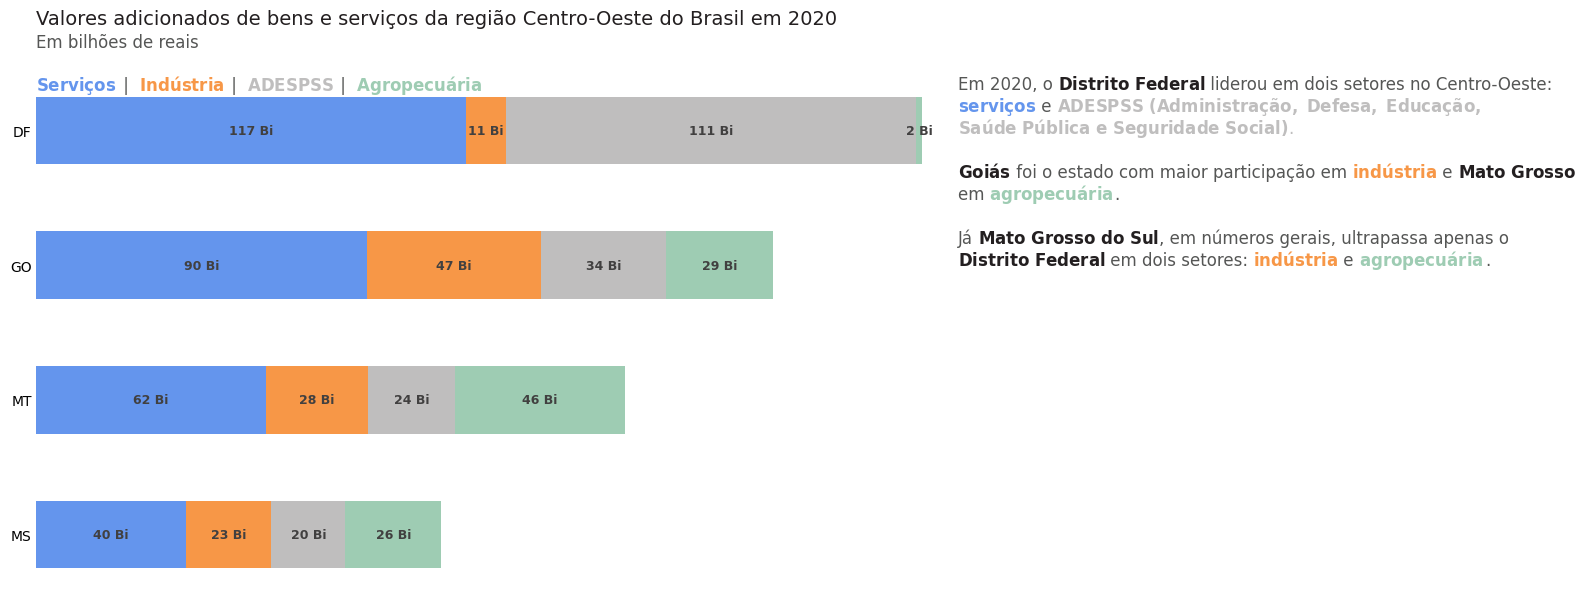

In [48]:
# Gerando o gráfico de barras empilhadas e salvando as cores que vamos utilizar no texto
ax, cores = grafico_va()

# Trabalhando com o texto colorido para legenda e anotações

# legenda das barras
ax.legend().remove()    # remover legenda padrão da visualização
texto_colorido(0, 3.3, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores=[[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)

# Anotando uma conclusão no gráfico
texto_colorido(
    # coordenadas
    250e9, 2,
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[CINZA3, CINZA1, CINZA3],                     # linha 1                          # cores
     [AZUL3, CINZA3, CINZA5],                      # linha 2
     [CINZA5],                                     # linha 3
     [CINZA3],                                     # linha 4
     [CINZA1, CINZA3, LARANJA1, CINZA3, CINZA1],   # linha 5
     [CINZA3, VERDE3, CINZA3],                     # linha 6
     [CINZA3],                                     # linha 7
     [CINZA3, CINZA1, CINZA3],     # linha 8
     [CINZA1, CINZA3, LARANJA1, CINZA3, VERDE3, CINZA3],   # linha 9
     ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()

## Aula 04 - Investigando a variação dos dados

### Desafio 1

In [4]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA' , '# FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [5]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_ind = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

# Selecionando os dados desejados
df_ind = df_ind[['regiao', 'ano', 'va_adespss']]

# Agrupando os dados por região e ano
df_ind = pd.crosstab(index=df_ind.ano, columns=df_ind.regiao, values=df_ind.va_adespss,
                     aggfunc='sum', normalize='index')
df_ind = (df_ind*100).round(2)
df_ind = df_ind[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
df_ind

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


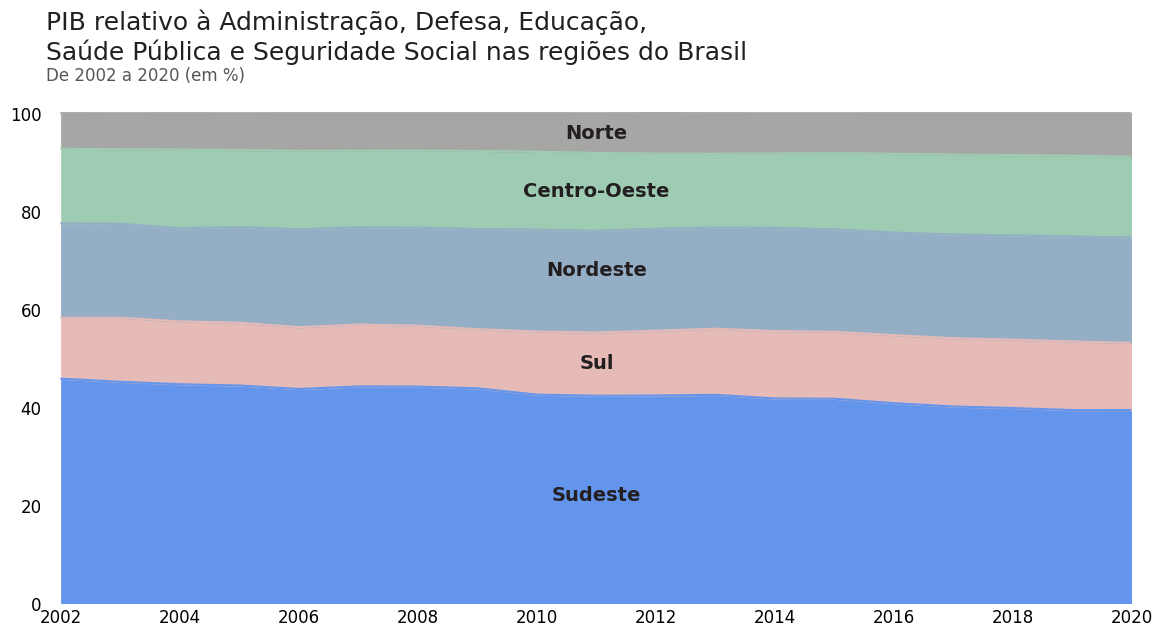

In [6]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14, 7))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE3, CINZA4]

# Gerando o gráfico de áreas empilhadas
df_ind.plot(kind='area', stacked=True, color=cores,
            ax=ax, xticks=range(2002, 2021, 2))

# Personalizando o gráfico
ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil',
             fontsize=18, color=CINZA1, loc='left', x=0, transform=ax.transAxes)
ax.text(0, 0.98, 'De 2002 a 2020 (em %)', transform=ax.transAxes,
        color=CINZA3, fontsize=12, ha='left', va='center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
plt.ylim(0, 110)              # ajustando os limites do eixo y
ax.set_xbound(2001.75, 2020)   # ajustando os limites do eixo x
ax.legend().remove()
ax.set_frame_on(False)

# Anotando os nomes das regiões
reg = df_ind.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(len(reg)):
    ax.text(2011, y_pos[i], f'{reg[i]}', color=CINZA1, weight='bold',
            fontsize=14, ha='center', transform=ax.transData)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

### Desafio 2

In [7]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')

# Selecionando os dados desejados
anos = [2010, 2015, 2020]
df_pib = df_pib.query('ano == @anos')[['regiao',  'ano', 'va_industria']]

# Agrupando os dados por região
df_pib = pd.crosstab(index=df_pib.ano, columns=df_pib.regiao,
                     values=df_pib.va_industria, aggfunc='sum', normalize='index')

df_pib = (df_pib * 100).round(1)
df_pib = df_pib[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]

df_pib.head()

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2010,58.8,17.1,11.6,6.1,6.5
2015,55.0,19.0,12.9,7.0,6.1
2020,52.0,19.2,12.2,7.3,9.3


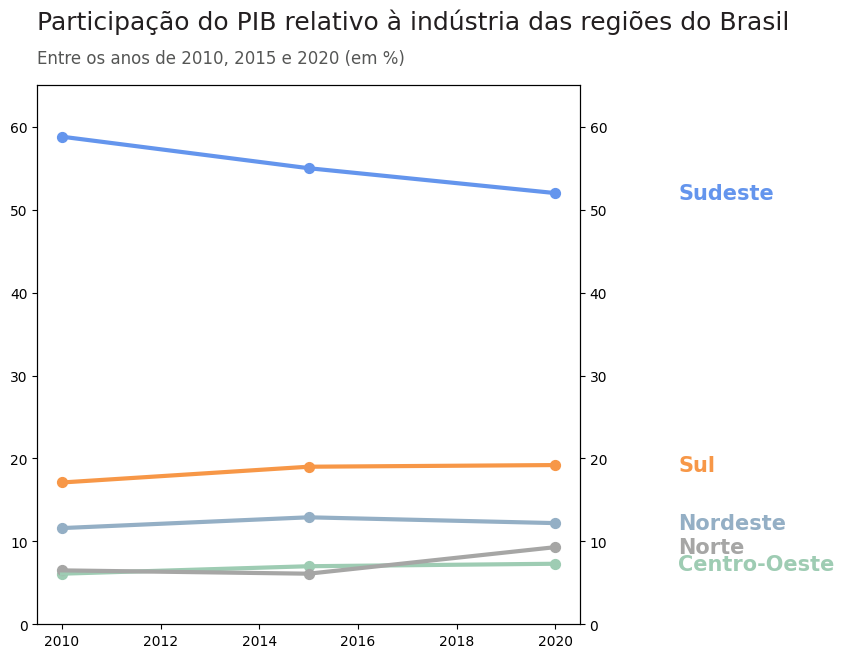

In [8]:
def grafico_slope_pib():
    # Importando as bibliotecas
    import matplotlib.pyplot as plt

    # Área do gráfico e tema da visualização
    fig, ax1 = plt.subplots(figsize=(7, 7))

    # Definindo as cores do gráfico
    cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

    # Gerando um axis duplo partilhando o eixo x e os mesmos limites em y
    ax2 = ax1.twinx()
    ax1.set_ylim([0, 65])
    ax2.set_ylim([0, 65])

    # Gerando o gráfico de inclinação (pontos + curva + texto)
    for i in range(5):
        # Adicionando o ponto inicial e final
        ax1.scatter(x=df_pib.index, y=df_pib.iloc[:, i], color=cores[i], s=50)

        # Adicionando a inclinação
        ax1.plot(df_pib.index, df_pib.iloc[:, i], color=cores[i], lw=3)

        # Adicionando as regiões no label
        ax1.text(x=2022.5, y=df_pib.iloc[-1, i], s=df_pib.columns[i],
                 fontsize=15, fontweight='bold', color=cores[i], va='center')

    # Personalizando o gráfico
    ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil',
                  fontsize=18, color=CINZA1, loc='left', pad=40)
    ax1.text(0, 1.05, 'Entre os anos de 2010, 2015 e 2020 (em %)',
             transform=ax1.transAxes, color=CINZA3, fontsize=12, ha='left', va='center')

    return ax1, ax2, cores


ax1, ax2, cores = grafico_slope_pib()

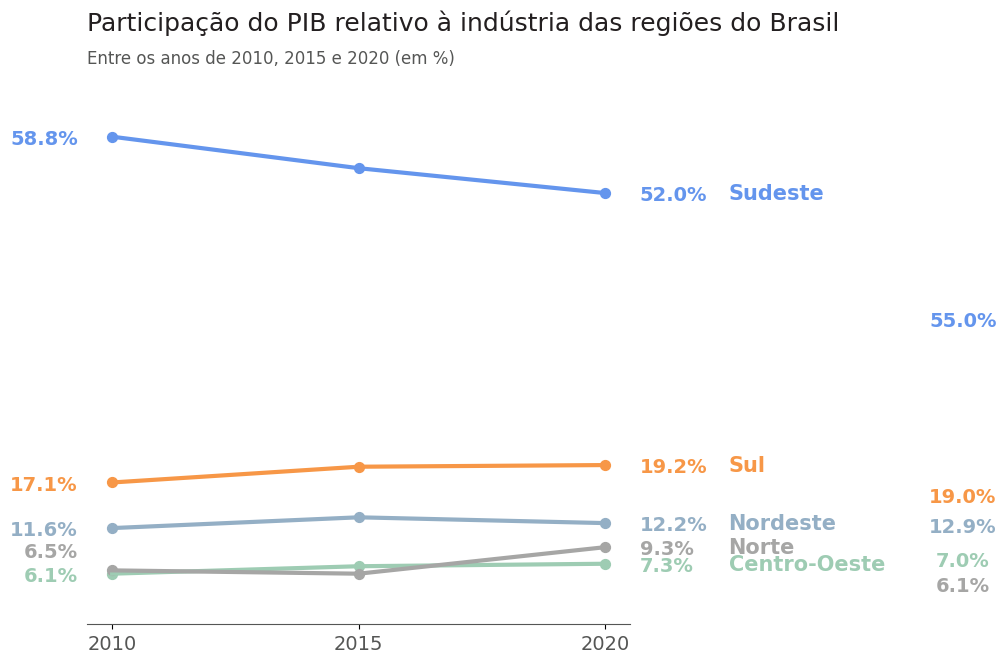

In [10]:
# Gerando o gráfico de inclinação
ax1, ax2, cores = grafico_slope_pib()

# Retirando os ticks do eixo y de ambos os lados e as bordas exeto a da base
ax1.tick_params(left=False)
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.tick_params(right=False)
ax2.set_frame_on(False)

# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2010, 2015, 2020], xticklabels=['2010', '2015', '2020'],
         yticks=df_pib.iloc[0, :],
         yticklabels=[f'{str(valor)}%' if i != 4 else f'{str(valor)}%\n\n' for i,
                      valor in enumerate(df_pib.iloc[0, :])]
         )

# Ajustando as propriedades do dos pontos centrais
valores = df_pib.iloc[1, :].values
y_pos = [53, 17, 11, 4, -1]
for i in range(len(valores)):
    ax1.text(2015, y_pos[i], f'{valores[i]}%', weight="bold",
             fontsize=14, color=cores[i], ha="center", transform=ax.transData)

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks=df_pib.iloc[2, :],
         yticklabels=[f'{str(valor)}%' for i, valor in enumerate(df_pib.iloc[2, :])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(14)
        item.set_fontweight('bold')
        item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()

## Aula 05 - Relacionando dados

### Desafio 1

### Desafio 2